In [1]:
import numpy as np

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K
import pandas as pd
import os

# Data Loading

In [2]:
pill_data = pd.read_csv('./Pillbox.csv')

C:\Users\PKNU\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pill_data['Enabled?'] = True
pill_data['has_image'] = True

In [4]:
pill_data

,ID,Enabled?,created at,updated at,spp,setid,splsize,pillbox_size,splshape,splshape_text,...,splimage,has_image,epc_match,version_number,laberer_code,application_number,updated,stale,new,Pillbox Value
0,41846,True,10/17/2017 05:32:23 PM,10/02/2020 05:14:07 PM,471fa2f1-73a0-49be-89f3-d3e2cfdaeca0-0603-5892-0,471fa2f1-73a0-49be-89f3-d3e2cfdaeca0,16.0,NaN,C48336,CAPSULE,...,NaN,True,NaN,5,NaN,NaN,True,False,False,False
1,8100,True,10/17/2017 05:29:56 PM,10/02/2020 04:59:28 PM,116e13c1-ac50-400f-880f-5779f0155b96-59779-074-0,116e13c1-ac50-400f-880f-5779f0155b96,10.0,NaN,C48348,ROUND,...,NaN,True,NaN,4,NaN,NaN,True,False,False,False
2,5258,True,10/17/2017 05:29:44 PM,10/17/2017 05:29:44 PM,827ce261-307b-4398-8993-333c08e601fe-49884-129-0,827ce261-307b-4398-8993-333c08e601fe,7.0,NaN,C48346,PENTAGON (5 SIDED),...,498840129,True,NaN,4,NaN,NaN,False,True,False,True
3,21271,True,10/17/2017 05:30:52 PM,10/02/2020 05:10:28 PM,f7f1c99e-1a67-4b34-b1f4-0ac38b9d8006-61480-137-0,f7f1c99e-1a67-4b34-b1f4-0ac38b9d8006,11.0,NaN,C48348,ROUND,...,NaN,True,NaN,8,NaN,NaN,True,False,False,False
4,77050,True,09/20/2019 09:10:47 PM,10/02/2020 05:14:51 PM,ecb28fcb-f0d1-4558-b460-ecabd0f6009e-62332-365-0,ecb28fcb-f0d1-4558-b460-ecabd0f6009e,6.0,NaN,C48348,ROUND,...,NaN,True,NaN,3,NaN,NaN,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83920,69440,True,06/27/2019 10:46:08 PM,10/02/2020 05:07:56 PM,facd5359-fc48-467d-ac98-b52e76527e70-70000-0356-0,facd5359-fc48-467d-ac98-b52e76527e70,12.0,NaN,C48345,OVAL,...,NaN,True,NaN,1,NaN,NaN,True,False,False,False
83921,53092,True,10/17/2017 09:57:47 PM,10/02/2020 05:15:29 PM,b46f11ca-bd09-42ba-b9d5-3953363272a4-41163-508-0,b46f11ca-bd09-42ba-b9d5-3953363272a4,19.0,NaN,C48348,ROUND,...,NaN,True,NaN,2,NaN,NaN,True,False,False,False
83922,4956,True,10/17/2017 05:29:42 PM,10/02/2020 05:01:01 PM,f8f84be1-e3b1-4e93-8e1c-ee93e1f4af13-41250-877-0,f8f84be1-e3b1-4e93-8e1c-ee93e1f4af13,19.0,NaN,C48345,OVAL,...,NaN,True,NaN,8,NaN,NaN,True,False,False,False
83923,19029,True,10/17/2017 05:30:42 PM,10/02/2020 05:09:03 PM,254b2202-b14d-9279-8311-cabcb0e75fc8-60505-3226-0,254b2202-b14d-9279-8311-cabcb0e75fc8,19.0,NaN,C48336,CAPSULE,...,NaN,True,NaN,6,NaN,NaN,True,False,False,False


In [5]:
pill_data.iloc[:, [0, 4, 6]]

,ID,spp,splsize
0,41846,471fa2f1-73a0-49be-89f3-d3e2cfdaeca0-0603-5892-0,16.0
1,8100,116e13c1-ac50-400f-880f-5779f0155b96-59779-074-0,10.0
2,5258,827ce261-307b-4398-8993-333c08e601fe-49884-129-0,7.0
3,21271,f7f1c99e-1a67-4b34-b1f4-0ac38b9d8006-61480-137-0,11.0
4,77050,ecb28fcb-f0d1-4558-b460-ecabd0f6009e-62332-365-0,6.0
...,...,...,...
83920,69440,facd5359-fc48-467d-ac98-b52e76527e70-70000-0356-0,12.0
83921,53092,b46f11ca-bd09-42ba-b9d5-3953363272a4-41163-508-0,19.0
83922,4956,f8f84be1-e3b1-4e93-8e1c-ee93e1f4af13-41250-877-0,19.0
83923,19029,254b2202-b14d-9279-8311-cabcb0e75fc8-60505-3226-0,19.0


In [6]:
pill_data[pill_data['splimage']=='0.1_Fludrocortisone_Acetate_Tablet']

,ID,Enabled?,created at,updated at,spp,setid,splsize,pillbox_size,splshape,splshape_text,...,splimage,has_image,epc_match,version_number,laberer_code,application_number,updated,stale,new,Pillbox Value
31364,33105,True,10/17/2017 05:31:43 PM,10/02/2020 05:02:07 PM,001e72ea-2c9e-468c-90cc-6c347234e2a9-68084-288-0,001e72ea-2c9e-468c-90cc-6c347234e2a9,6.0,NaN,C48348,ROUND,...,0.1_Fludrocortisone_Acetate_Tablet,True,1.0,5,NaN,NaN,True,False,False,True


In [7]:
pill_data = pill_data.dropna(subset=['splimage'])

In [8]:
pill_data

,ID,Enabled?,created at,updated at,spp,setid,splsize,pillbox_size,splshape,splshape_text,...,splimage,has_image,epc_match,version_number,laberer_code,application_number,updated,stale,new,Pillbox Value
2,5258,True,10/17/2017 05:29:44 PM,10/17/2017 05:29:44 PM,827ce261-307b-4398-8993-333c08e601fe-49884-129-0,827ce261-307b-4398-8993-333c08e601fe,7.0,NaN,C48346,PENTAGON (5 SIDED),...,498840129,True,NaN,4,NaN,NaN,False,True,False,True
12,20426,True,10/17/2017 05:30:48 PM,10/17/2017 05:30:48 PM,7b0e4dde-f2c4-415c-893f-6811380a0e66-0555-1883-0,7b0e4dde-f2c4-415c-893f-6811380a0e66,12.0,NaN,C48336,CAPSULE,...,005551883,True,NaN,5,NaN,NaN,False,True,False,True
29,34634,True,10/17/2017 05:31:51 PM,10/17/2017 05:31:51 PM,0c68a168-91a2-4d1f-85e7-b22b92ef1c2e-62584-975-0,0c68a168-91a2-4d1f-85e7-b22b92ef1c2e,22.0,NaN,C48336,CAPSULE,...,625840975,True,1.0,2,NaN,NaN,False,True,False,True
32,29801,True,10/17/2017 05:31:28 PM,10/02/2020 05:10:38 PM,3a171942-37af-430d-8b9d-bb678ca2be4b-0228-2855-0,3a171942-37af-430d-8b9d-bb678ca2be4b,12.0,NaN,C48345,OVAL,...,00228-2855-11_NLMIMAGE10_0B4085F4,True,NaN,17,NaN,NaN,True,False,False,True
36,3766,True,10/17/2017 05:29:37 PM,10/17/2017 05:29:37 PM,a7baa9ea-6cd5-4a86-8936-8e47ed794db5-63739-375-0,a7baa9ea-6cd5-4a86-8936-8e47ed794db5,19.0,NaN,C48336,CAPSULE,...,637390375,True,1.0,2,NaN,NaN,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83893,42595,True,10/17/2017 05:32:26 PM,10/17/2017 05:32:26 PM,7d27c65e-b60b-4f83-a01a-02dc67f61a8b-0603-5689-0,7d27c65e-b60b-4f83-a01a-02dc67f61a8b,14.0,NaN,C48345,OVAL,...,00603-5689-20_FD0E7ED3,True,NaN,27,NaN,NaN,False,True,False,True
83894,34351,True,10/17/2017 05:31:49 PM,10/17/2017 05:31:49 PM,7e29a5ba-57d1-46c5-a93f-ba6b3d6b3327-60429-068-0,7e29a5ba-57d1-46c5-a93f-ba6b3d6b3327,18.0,NaN,C48336,CAPSULE,...,604290068,True,1.0,2,NaN,NaN,False,True,False,True
83899,20740,True,10/17/2017 05:30:50 PM,10/02/2020 05:11:19 PM,5fe9c118-c44b-48d7-a142-9668ae3df0c6-0002-5123-0,5fe9c118-c44b-48d7-a142-9668ae3df0c6,11.0,NaN,C48343,HEXAGON (6 SIDED),...,000025123,True,NaN,35,NaN,NaN,True,False,False,True
83900,36489,True,10/17/2017 05:31:59 PM,10/02/2020 05:08:30 PM,7023927e-1829-49c0-5c81-693489000d1c-0074-3290-0,7023927e-1829-49c0-5c81-693489000d1c,19.0,NaN,C48345,OVAL,...,00074-3290-13_EC1D766B,True,NaN,1504,NaN,NaN,True,False,False,True


In [9]:
import glob
from glob import glob
data_dir = os.chdir("D:\pillbox_production_images_full_202008")
data_list = glob('*.jpg')
data_list[1:5]

['0.1_mg_Clonidine_HCl_Tablet.jpg',
 '0.25_mg_Alprazolam_Tablet.jpg',
 '0.2_mg_Clonidine_HCl_Tablet.jpg',
 '0.5_mg_Alprazolam_Tablet.jpg']

In [10]:
len(data_list)

8693

# Image Preprocessing

In [11]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text_to_word_sequence(data_list[0])

['0', '1', 'fludrocortisone', 'acetate', 'tablet', 'jpg']

In [12]:
label=[]
for n, path in enumerate(data_list[:100]):
    token = text_to_word_sequence(data_list[n])
    label.append(token[-2])

from sklearn.preprocessing import LabelEncoder
items = label
encoder = LabelEncoder()
encoder.fit(items)
label=encoder.transform(items)

In [13]:
encoder.inverse_transform(label)

array(['tablet', 'tablet', 'tablet', 'tablet', 'tablet', 'tablet',
       '391e1c80', '3e1e1f50', '1b158d9c', '361e1b30', '3f1e1f80',
       '431e21c1', '451e2281', 'a91354ea', 'b215591a', 'b5155aca',
       'b8155c1a', '9516caa6', '8f16c7a6', '8c16c656', '000023227',
       '000023230', '000023231', '000023232', '000023234', '000023240',
       '000024112', '000024115', '000024116', '000024117', '000024165',
       '000024415', '000024420', '000024453', '000024454', '000024455',
       '000025121', '000025123', '1a1b8d0c', 'f215f93f', '000030524',
       '000030527', '000030528', '000030830', '000030852', '000030893',
       '000030894', '000031611', '000031612', '000031964', '000031965',
       '000031966', '000031967', '000033622', '000033623', '000033624',
       '000033631', '000034215', '000034221', '000034223', '000035178',
       '000035194', '000035195', '000036335', 'b8135c6a', '5e132f39',
       '491e24c1', '8e41c70e', '293f949c', '000040038', '000040143',
       '000040144'

In [14]:
data_list[0]

'0.1_Fludrocortisone_Acetate_Tablet.jpg'

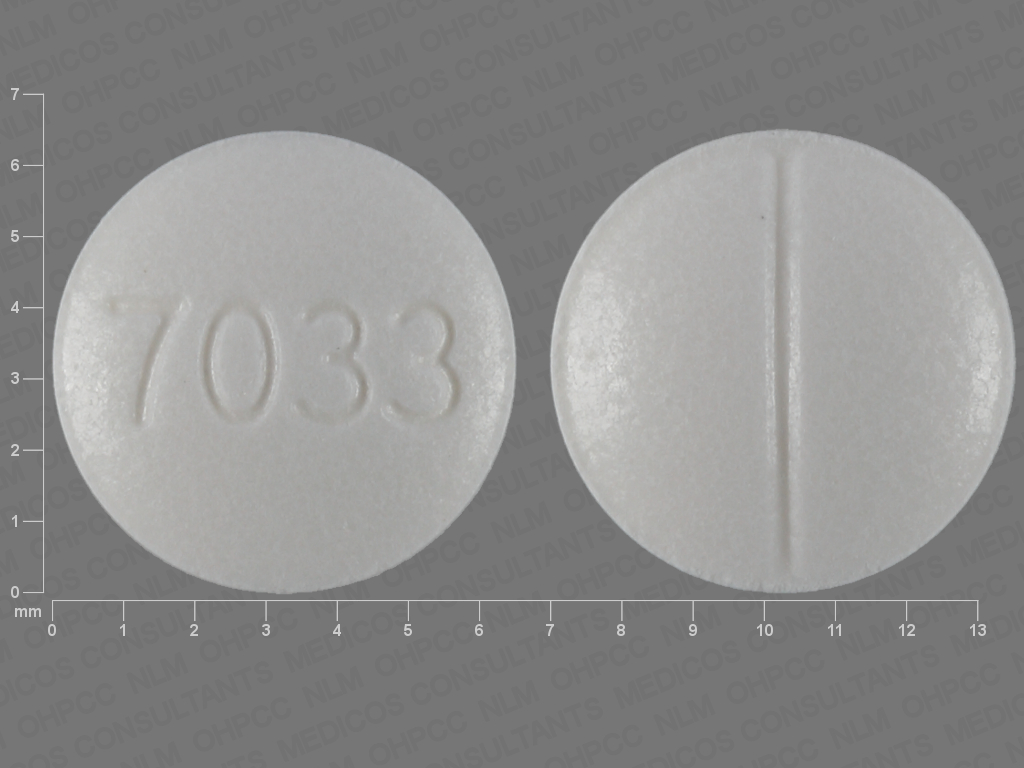

In [22]:
from PIL import Image

img = Image.open('/pillbox_production_images_full_202008/0.1_Fludrocortisone_Acetate_Tablet.jpg')

img


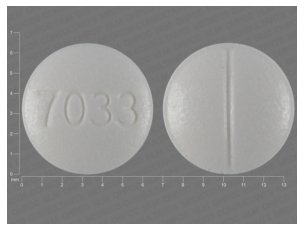

In [25]:
img_array = np.array(img)

# 2. 히트맵 그리기
import matplotlib.pylab as plt


plt.imshow(img_array)
plt.axis("off")
plt.show()

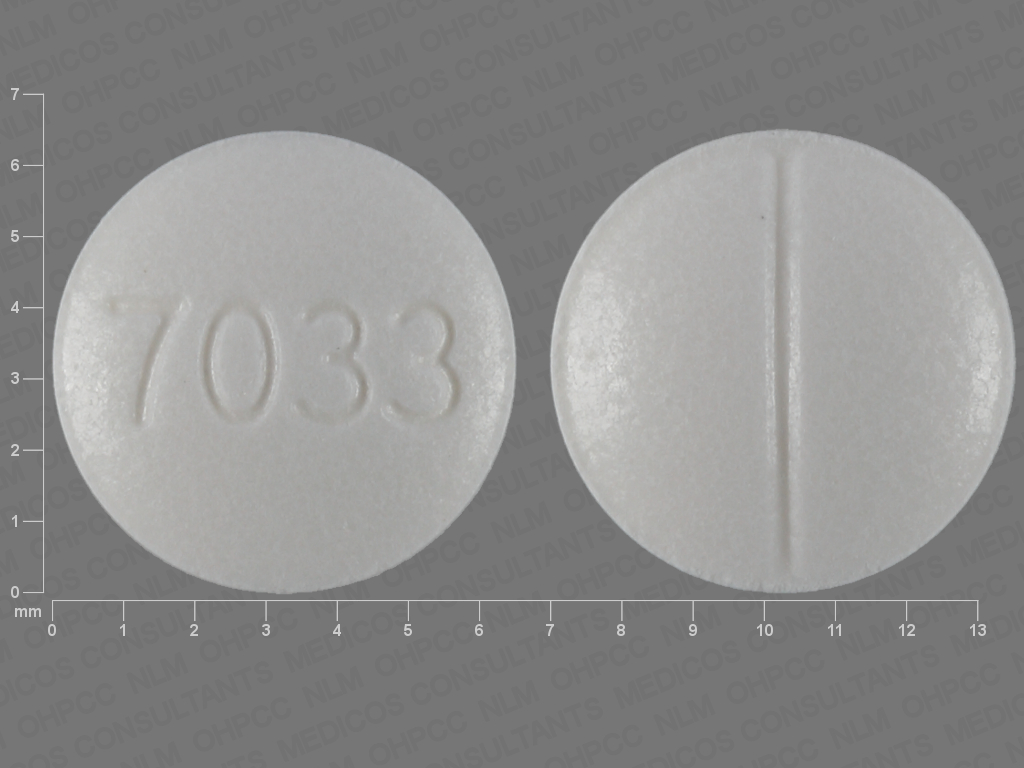

In [26]:
Image.fromarray(img_array)

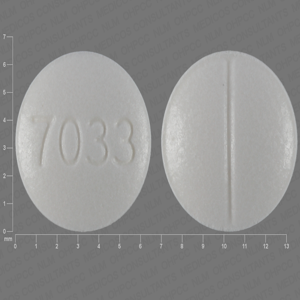

In [30]:
img_resize = img.resize((300,300))
img_resize

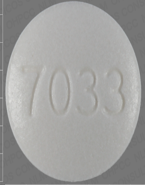

In [43]:
img_crop = img_resize.crop((10, 50, 155, 235)) # left-top / right-bottom
img_crop